# Predict the variable " Value-Co2-emissions"

###  Import library

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline


## Preliminary: Load Data and Quality Assessment

In [ ]:
data = pd.read_csv('/data/global_data_on_sustainable_energy.csv')
data.head()


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
data.describe()


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.drop(columns='Electricity from fossil fuels (TWh)', inplace=True) # For pedagogic purpose


In [ ]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
print(data.dtypes)

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_emissions_kt_by_country                                   float64
Renewables (

In this case, the years follow a sequential order from 2000 to 2020. Therefore, "Year" can be considered a categorical variable with order. This means that the years are not merely labels but represent a progression in time, with each year having a logical and sequential relationship to the previous and subsequent years.

In [ ]:
data["Entity"]=pd.Categorical(data["Entity"],ordered=False)
data["Year"]=pd.Categorical(data["Year"],ordered=True)
data["Density\\n(P/Km2)"]=pd.to_numeric(data["Density\\n(P/Km2)"].str.replace(',', ''), errors='coerce')

In [ ]:
data.dtypes

Entity                                                              category
Year                                                                category
Access to electricity (% of population)                              float64
Access to clean fuels for cooking                                    float64
Renewable-electricity-generating-capacity-per-capita                 float64
Financial flows to developing countries (US $)                       float64
Renewable energy share in the total final energy consumption (%)     float64
Electricity from nuclear (TWh)                                       float64
Electricity from renewables (TWh)                                    float64
Low-carbon electricity (% electricity)                               float64
Primary energy consumption per capita (kWh/person)                   float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          float64
Value_co2_emissions_kt_by_country                                    float64

In [ ]:
missing_rates = data.isna().mean()
missing_rates * 100

Entity                                                               0.000000
Year                                                                 0.000000
Access to electricity (% of population)                              0.274048
Access to clean fuels for cooking                                    4.631406
Renewable-electricity-generating-capacity-per-capita                25.513839
Financial flows to developing countries (US $)                      57.248561
Renewable energy share in the total final energy consumption (%)     5.316525
Electricity from nuclear (TWh)                                       3.453001
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Primary energy consumption per capita (kWh/person)                   0.000000
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Value_co2_emissions_kt_by_country                               

In [ ]:
# The threshold for missing values
threshold = 0.25  # 25%

# Drop columns with missing values exceeding 25%
columns_to_drop = data.columns[missing_rates > threshold]

data.drop(columns=columns_to_drop, inplace = True)

data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Access to electricity (% of population),3639.0,78.933702,3.027554e+01,1.252269,59.800890,98.361570,100.000000,1.000000e+02
Access to clean fuels for cooking,3480.0,63.255287,3.904366e+01,0.000000,23.175000,83.150000,100.000000,1.000000e+02
Renewable energy share in the total final energy consumption (%),3455.0,32.638165,2.989490e+01,0.000000,6.515000,23.300000,55.245000,9.604000e+01
Electricity from nuclear (TWh),3523.0,13.450190,7.300662e+01,0.000000,0.000000,0.000000,0.000000,8.094100e+02
Electricity from renewables (TWh),3628.0,23.968010,1.044311e+02,0.000000,0.040000,1.470000,9.600000,2.184940e+03
Low-carbon electricity (% electricity),3607.0,36.801182,3.431488e+01,0.000000,2.877847,27.865068,64.403792,1.000000e+02
Primary energy consumption per capita (kWh/person),3649.0,25743.981745,3.477322e+04,0.000000,3116.737300,13120.570000,33892.780000,2.625857e+05
Energy intensity level of primary energy (MJ/$2017 PPP GDP),3442.0,5.307345,3.532020e+00,0.110000,3.170000,4.300000,6.027500,3.257000e+01
Value_co2_emissions_kt_by_country,3221.0,159866.462686,7.736611e+05,10.000000,2019.999981,10500.000000,60580.001830,1.070722e+07
gdp_growth,3332.0,3.441610,5.686720e+00,-62.075920,1.383302,3.559855,5.830099,1.231396e+02


In [ ]:
data=data.dropna() # Delete all individuals which have missing values

In [ ]:
print(data.shape)

(2868, 17)


In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Access to electricity (% of population),2868.0,76.584630,3.151037e+01,1.252269,53.237811,97.000000,100.000000,1.000000e+02
Access to clean fuels for cooking,2868.0,62.170084,3.923855e+01,0.000000,22.075000,81.550000,100.000000,1.000000e+02
Renewable energy share in the total final energy consumption (%),2868.0,35.802071,3.002400e+01,0.000000,9.187500,28.790000,60.667500,9.604000e+01
Electricity from nuclear (TWh),2868.0,15.337019,7.877607e+01,0.000000,0.000000,0.000000,0.000000,8.094100e+02
Electricity from renewables (TWh),2868.0,26.603375,1.076403e+02,0.000000,0.090000,1.680000,10.102500,2.014570e+03
Low-carbon electricity (% electricity),2868.0,39.629403,3.445488e+01,0.000000,6.091074,35.009718,66.879318,1.000000e+02
Primary energy consumption per capita (kWh/person),2868.0,26082.456843,3.709746e+04,105.110120,2779.966525,11922.761000,31838.556000,2.625857e+05
Energy intensity level of primary energy (MJ/$2017 PPP GDP),2868.0,5.418111,3.577415e+00,1.030000,3.280000,4.400000,6.140000,3.257000e+01
Value_co2_emissions_kt_by_country,2868.0,168818.218105,8.180202e+05,30.000000,2187.500060,10424.999715,58145.000460,1.070722e+07
gdp_growth,2868.0,3.895326,4.645613e+00,-36.658153,1.770575,3.788166,5.957490,6.337988e+01


### Statistique unidimensionnelle

Kernel density estimation (KDE) in seaborn's histplot function, is an optional parameter that controls whether to overlay a kernel density estimate on top of the histogram.

Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. It works by placing a kernel (a smooth, symmetric function, such as a Gaussian) at each data point and summing up the contributions from all kernels to estimate the density at any given point.

When **'kde=True'**, seaborn will estimate the kernel density of the data and plot it as a smooth curve over the histogram bars. This curve represents a smoothed version of the underlying distribution of the data.

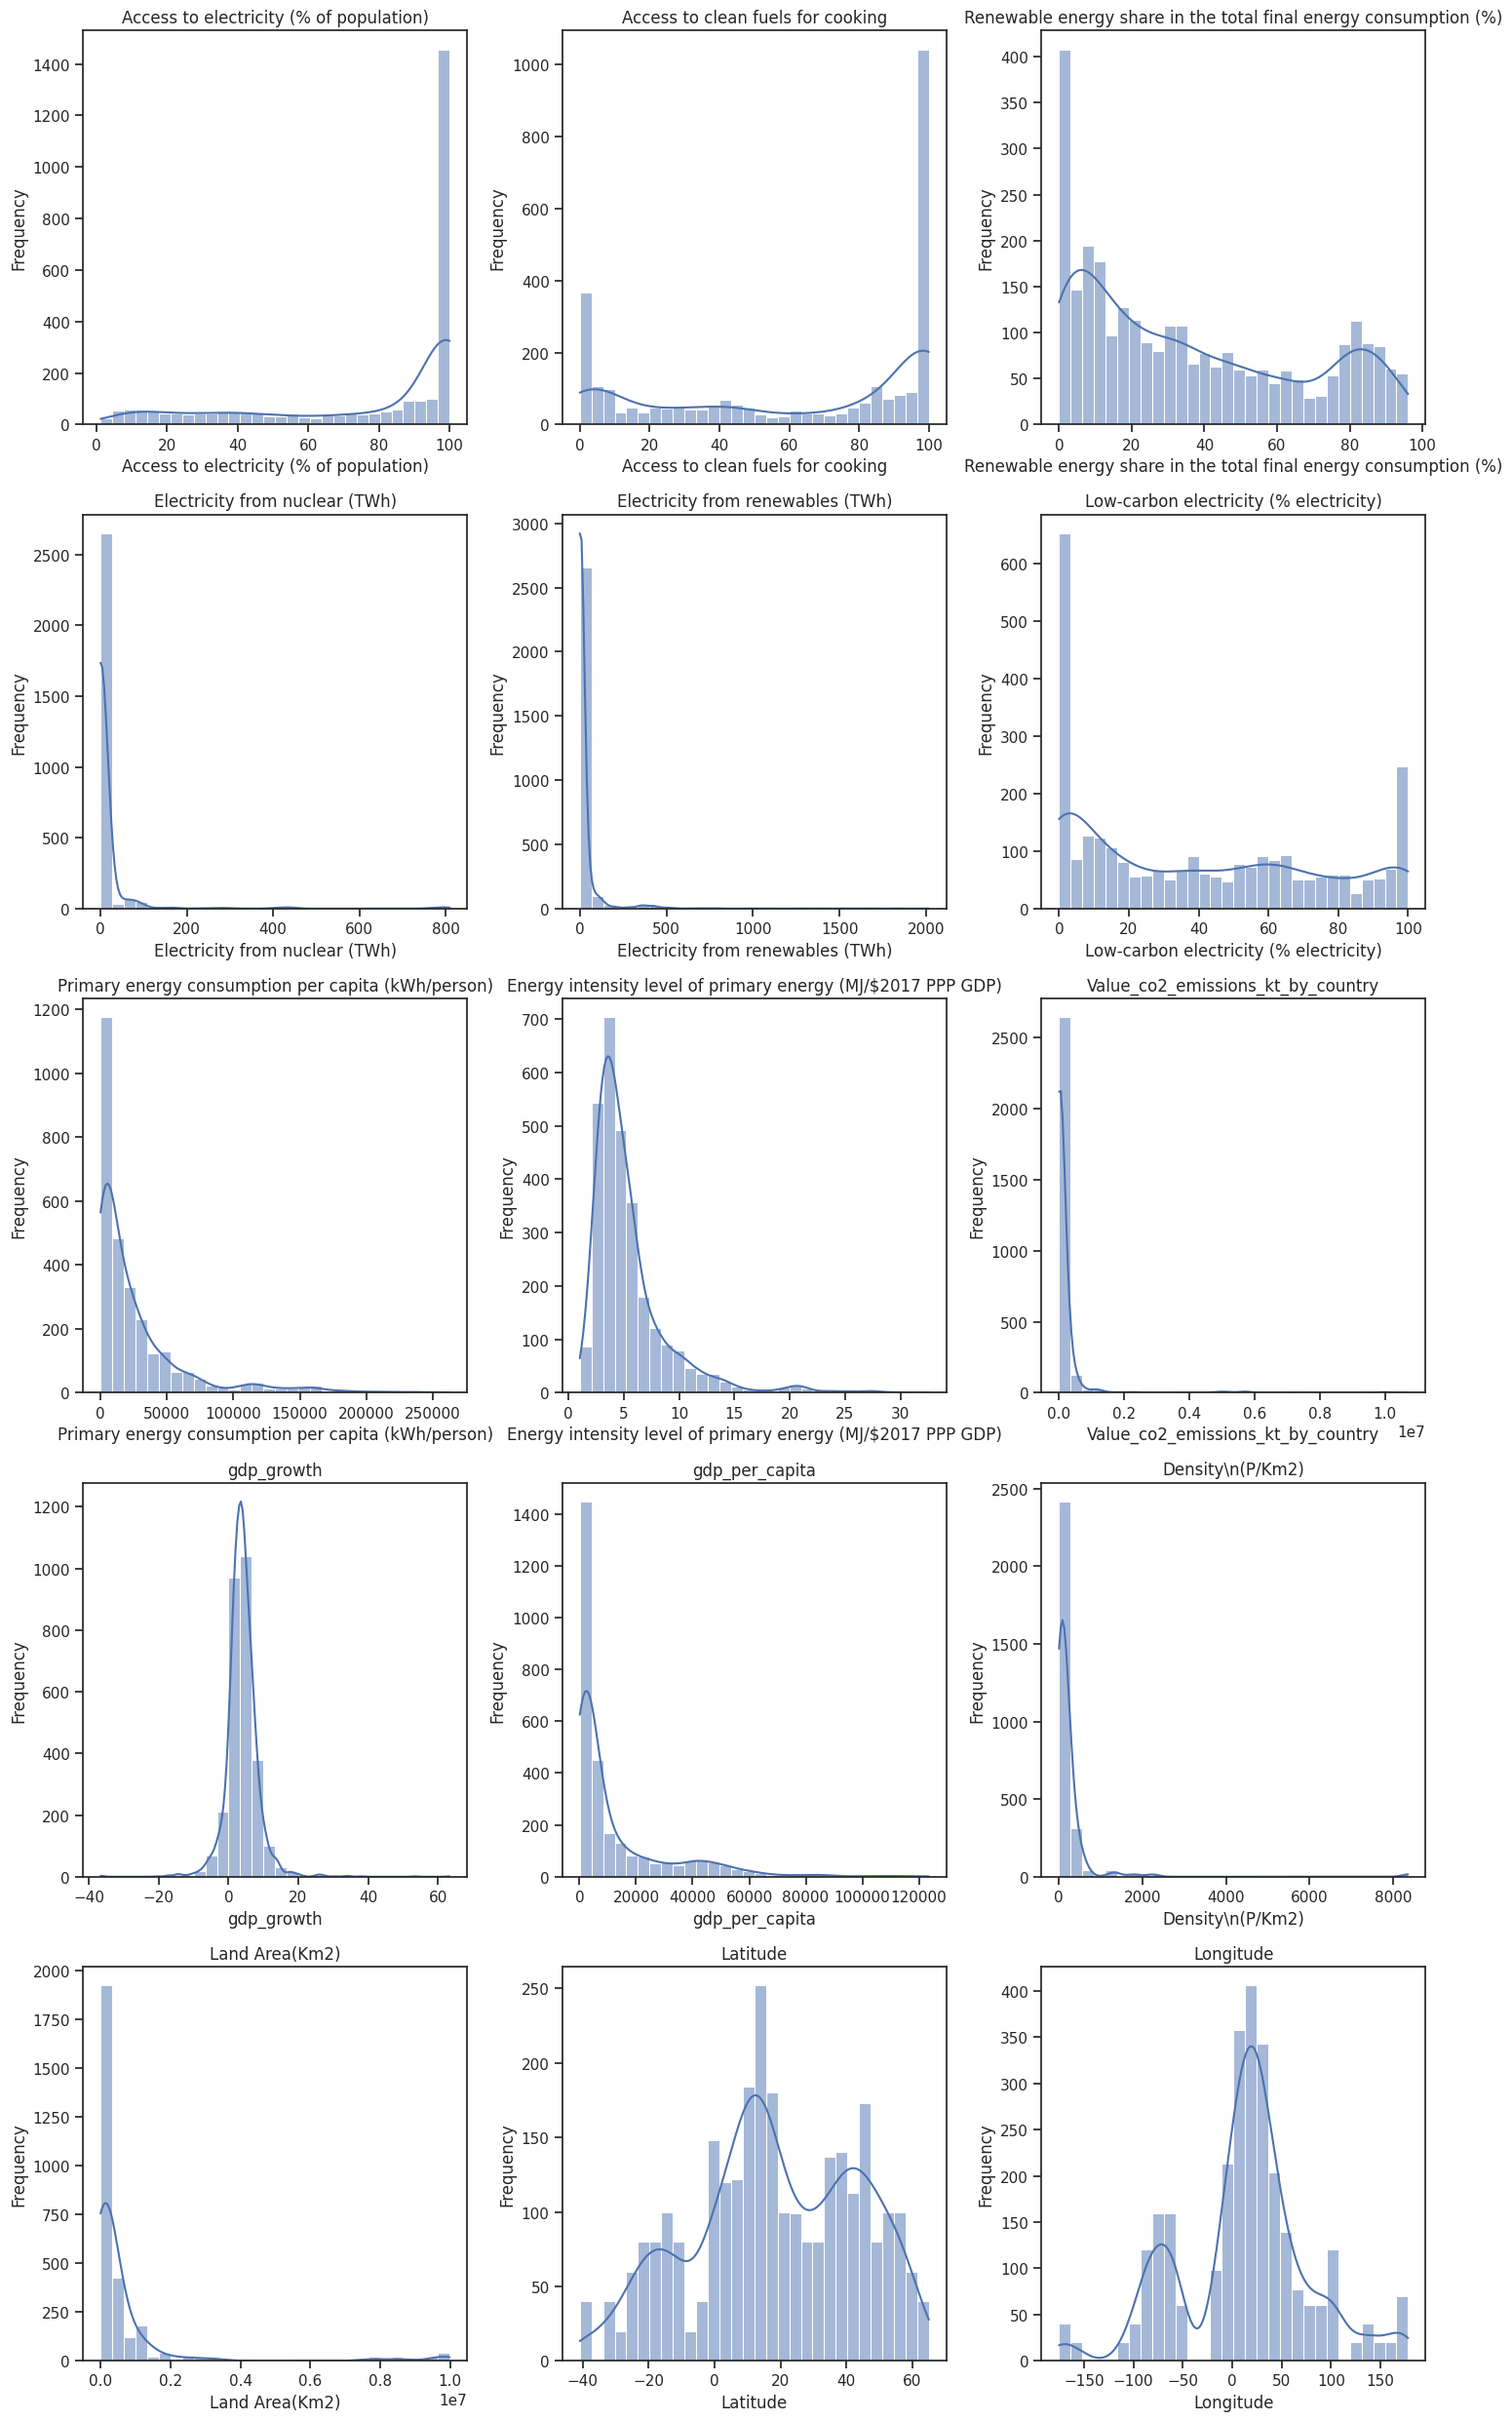

In [ ]:
# Filter out the quantitative variables
quantitative_variables = data.select_dtypes(include=['float64']).columns

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.flatten()

# Iterate over each quantitative variable and create individual plots
for i, column in enumerate(quantitative_variables):
    sns.histplot(data=data[column], bins = 30, kde=True, ax=axes[i])  # Create histogram plot
    axes[i].set_title(f'{column}')  # Set title for the plot
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


For most of the variables, which are right-skewed, a logarithmic transformation is often a good choice. However, since logarithms cannot handle zero or negative values, we must account for this before applying the transformation. In cases where the minimum value is zero, we might add a small constant to all values. For variables that already have a roughly normal distribution or are categorical (like gdp_growth), we may not need to apply any transformation.

In [ ]:
df_normalized = data.copy()

# List of variables to normalize
# Exclude Latitude and Longitude as they are categorical and already have a bounded range
variables_to_normalize = [
    #'Access to electricity (% of population)',
    #'Access to clean fuels for cooking',
    #'Renewable energy share in the total final energy consumption (%)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    #'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Value_co2_emissions_kt_by_country',
    #'gdp_growth',
    'gdp_per_capita',
    'Density\\n(P/Km2)',
    'Land Area(Km2)',
    #'Latitude',
    #'Longitude'
]

# Apply log transformation to the right-skewed variables
# Adding a small constant (1) to avoid log(0)
for variable in variables_to_normalize:
    df_normalized[variable] = np.log(df_normalized[variable])



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


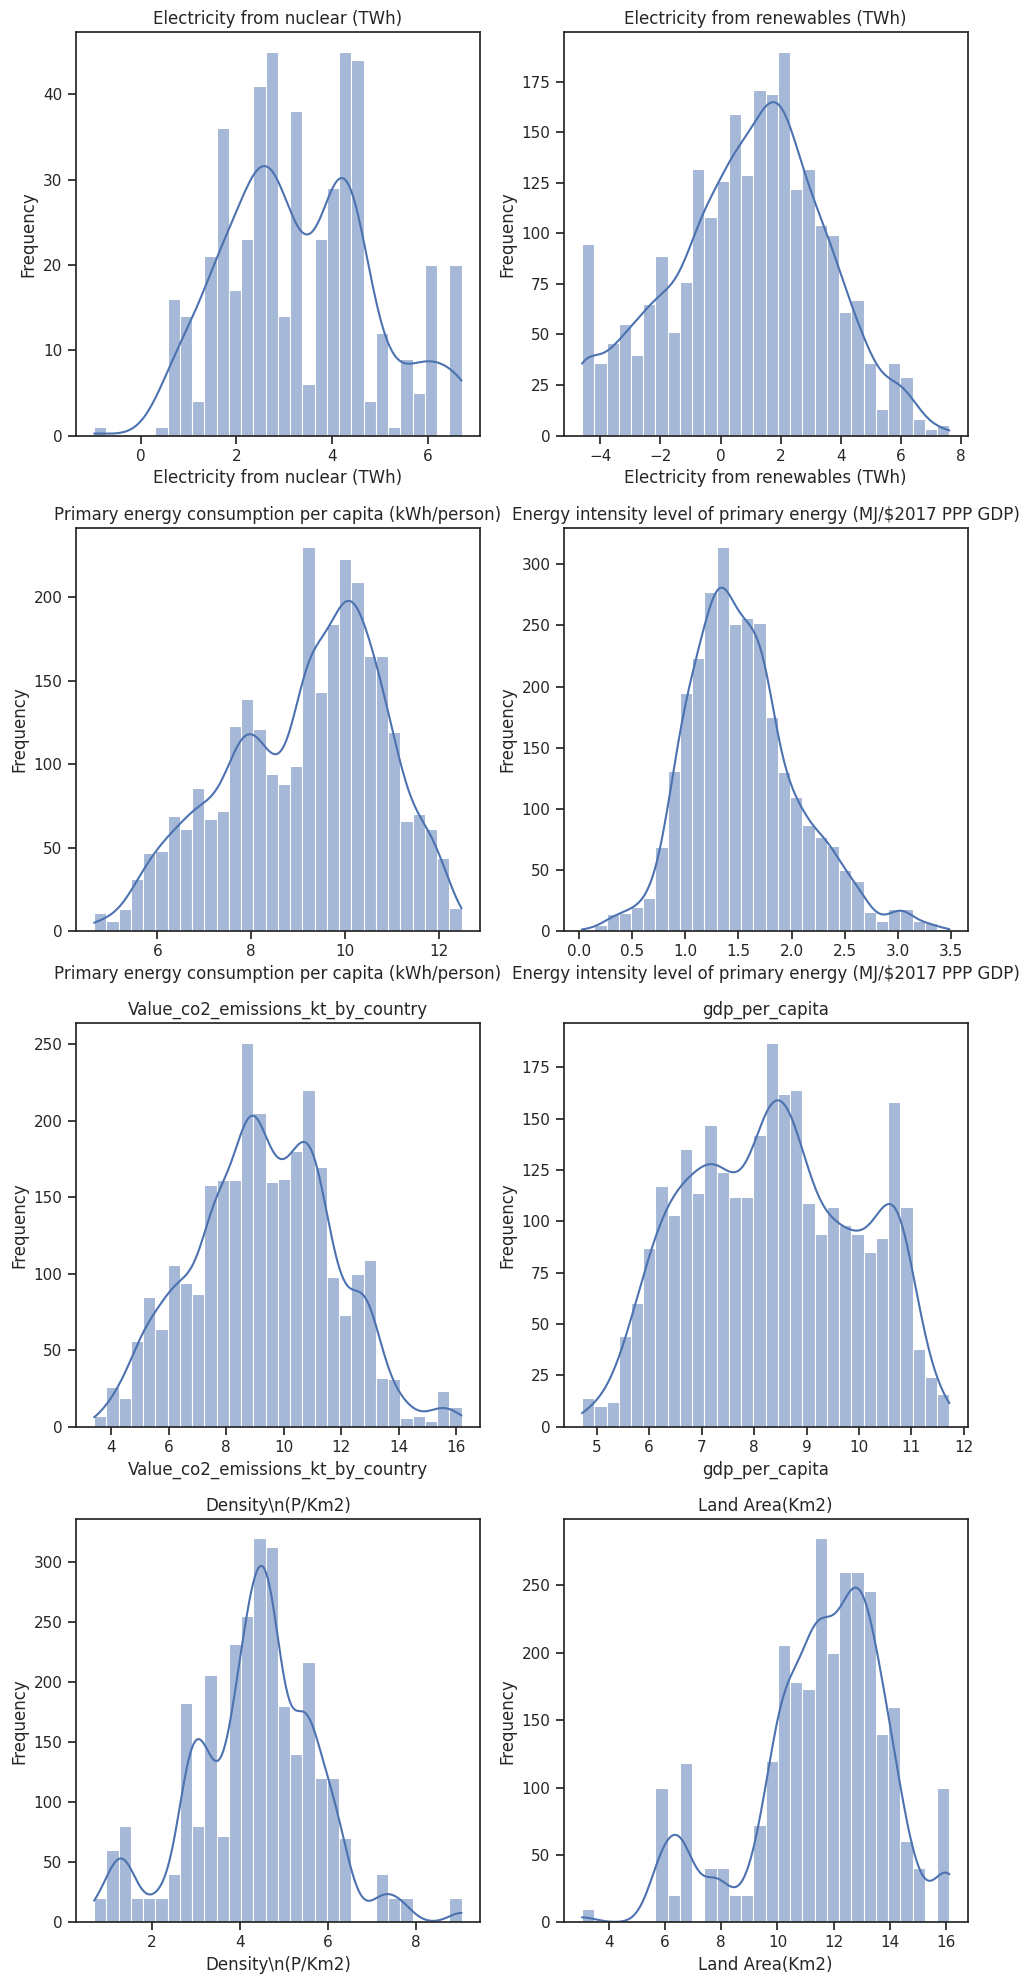

In [ ]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

# Iterate over each quantitative variable and create individual plots
for i, column in enumerate(variables_to_normalize):
    sns.histplot(data=df_normalized[column], bins = 30, kde=True, ax=axes[i])  # Create histogram plot
    axes[i].set_title(f'{column}')  # Set title for the plot
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()